In [30]:
import os
import seaborn as sns
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

dir = '../raw_eval_data/overlapper/'
files = [dir + i for i in os.listdir(dir) if '.json' in i]
files

['../raw_eval_data/overlapper/merged_bbmerge.fq.json',
 '../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json',
 '../raw_eval_data/overlapper/out.extendedFrags.fastq.json']

In [31]:
os.listdir('../raw_eval_data/overlapper')

['merged_bbmerge.fq.json',
 'merged_hts.fa_SE.fastq.json',
 'out.extendedFrags.fastq.json']

In [32]:
with open(files[0]) as f:
    d = json.load(f)


../raw_eval_data/overlapper/merged_bbmerge.fq.json


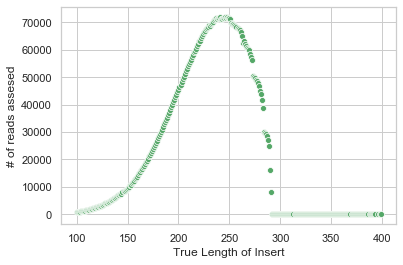

../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json


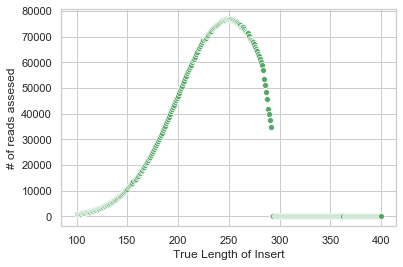

../raw_eval_data/overlapper/out.extendedFrags.fastq.json


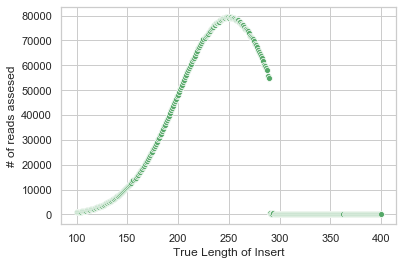

In [33]:
import numpy as np
import seaborn as sns
import statistics
sns.set(style="whitegrid")

for file in files:
    with open(file) as f:
        fig, ax = plt.subplots(1, 1)
        d = json.load(f)
        x = [int(i) for i in list(d.keys())]
        x.sort()
        # print(x)
        y = []
        for i in x:

            keys = [int(z) for z in x]
            keys.sort()
            temp_y = []
            for dif in d[str(i)].keys():
                temp_y += [int(dif) for dif in range(0, d[str(i)][dif])]
            y.append(statistics.mean(temp_y))

        # Plot the residuals after fitting a linear model
        print(file)
        sns.scatterplot(x, y, color="g")
        ax.set(xlabel='True Length of Insert',
               ylabel='# of reads assesed',
               title="")
        
        plt.show()

../raw_eval_data/overlapper/merged_bbmerge.fq.json


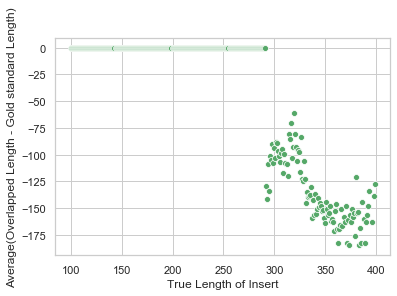

../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json


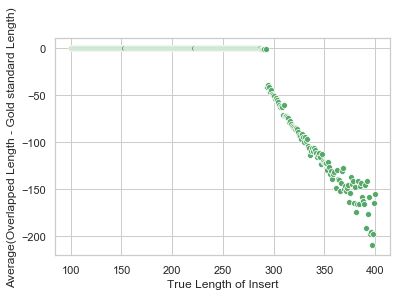

../raw_eval_data/overlapper/out.extendedFrags.fastq.json


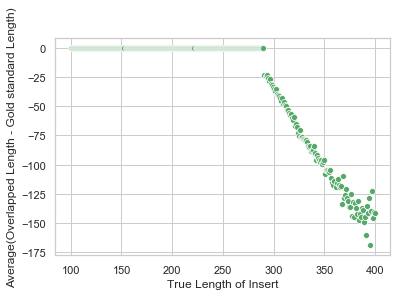

In [34]:

sns.set(style="whitegrid")

for file in files:
    with open(file) as f:
        

        fig, ax = plt.subplots(1, 1)
        d = json.load(f)

        # Make an example dataset with y ~ x
        # rs = np.random.RandomState(7)
        x = [int(i) for i in list(d.keys())]
        x.sort()
#         print(x)
        y = []
        for i in x:

            keys = [int(z) for z in x]
            keys.sort()
            temp_y = []
            for dif in d[str(i)].keys():
                temp_y += [int(dif) for f in range(0, d[str(i)][dif])]
            y.append(statistics.mean(temp_y))

        # Plot the residuals after fitting a linear model
        print(file)
        sns.scatterplot(x, y, color="g")
        ax.set(xlabel='True Length of Insert',
               ylabel='Average(Overlapped Length - Gold standard Length)',
               title="")
        
        plt.show()

../raw_eval_data/overlapper/merged_bbmerge.fq.json


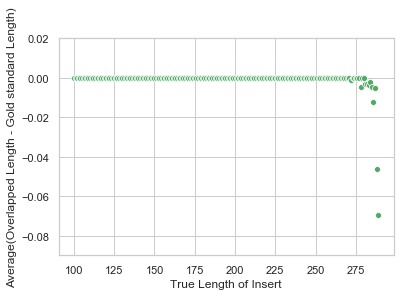

../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json


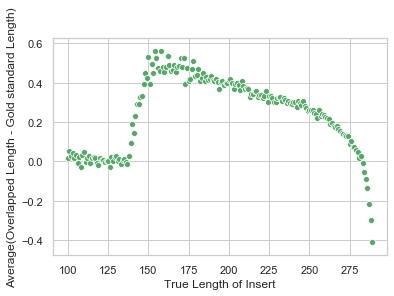

../raw_eval_data/overlapper/out.extendedFrags.fastq.json


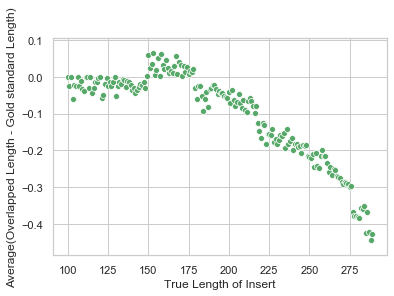

In [35]:
sns.set(style="whitegrid")

for file in files:
    with open(file) as f:
        d = json.load(f)

        # Make an example dataset with y ~ x
        # rs = np.random.RandomState(7)
        fig, ax = plt.subplots(1, 1)

        x = [int(i) for i in list(d.keys())]
        x.sort()
        x = [i for i in x if i < 290]
#         print(x)
        y = []
        for i in x:

            keys = [int(z) for z in x]
            keys.sort()
            temp_y = []
            for dif in d[str(i)].keys():
                temp_y += [int(dif) for f in range(0, d[str(i)][dif])]
            y.append(statistics.mean(temp_y))

        # Plot the residuals after fitting a linear model
        print(file)
        sns.scatterplot(x, y, color="g")
        ax.set(xlabel='True Length of Insert',
               ylabel='Average(Overlapped Length - Gold standard Length)',
               title="")
        plt.show()
        
# Do heatmap
# Decrease bbmerge stringency 
# samtools
# work on paper
# work on 

In [36]:
def get_stats(tool_dict):
    correct = 0
    incorrect = 0
    for i in tool_dict.keys():
        for y in tool_dict[i].keys():
            if y == "0":
                correct += tool_dict[i][y]
            else: 
                incorrect += tool_dict[i][y]
    
    return (correct/(correct+incorrect), correct+incorrect)

def get_per_len_stats(tool_dict):
    len_list = []
    prop_list = []
    for i in tool_dict.keys():
        correct = 0
        incorrect = 0
        for y in tool_dict[i].keys():
            if y == "0":
                correct += tool_dict[i][y]
            else: 
                incorrect += tool_dict[i][y]
    
        prop_list.append((correct/(correct+incorrect)))
        len_list.append(i)
    return (prop_list, len_list)

In [37]:
for file in files:
    with open(file) as f:
        d = json.load(f)
        print(file)
        print(get_stats(d))

../raw_eval_data/overlapper/merged_bbmerge.fq.json
(0.9997455221199693, 13592537)
../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json
(0.9861446523489108, 15622560)
../raw_eval_data/overlapper/out.extendedFrags.fastq.json
(0.9875932139014529, 15965698)


../raw_eval_data/overlapper/merged_bbmerge.fq.json


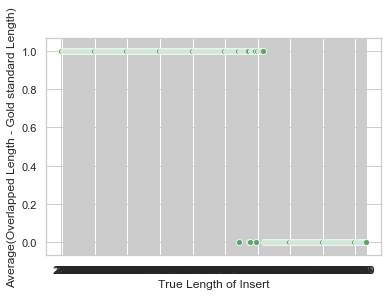

../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json


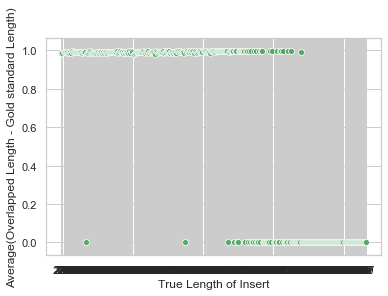

../raw_eval_data/overlapper/out.extendedFrags.fastq.json


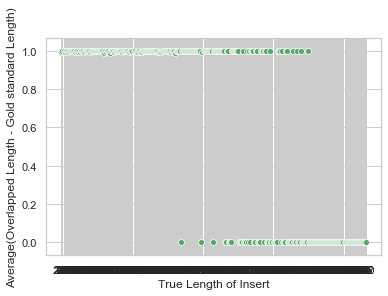

In [38]:
sns.set(style="whitegrid")

for file in files:
    with open(file) as f:
        d = json.load(f)

        # Make an example dataset with y ~ x
        # rs = np.random.RandomState(7)
        fig, ax = plt.subplots(1, 1)

        # Plot the residuals after fitting a linear model
        print(file)
        this = get_per_len_stats(d) 
        sns.scatterplot(this[1], this[0], color="g")
        ax.set(xlabel='True Length of Insert',
               ylabel='Average(Overlapped Length - Gold standard Length)',
               title="")
        plt.show()

# Heatmap

{'279': {'0': 93482}, '261': {'0': 133149}, '253': {'0': 139040}, '258': {'0': 135997}, '244': {'0': 143286}, '213': {'0': 114421}, '171': {'0': 42201}, '203': {'0': 96335}, '241': {'0': 143664}, '242': {'0': 142774}, '218': {'0': 122637}, '267': {'0': 120927}, '210': {'0': 109548}, '245': {'0': 143319}, '150': {'0': 19038}, '255': {'0': 138348}, '289': {'0': 49510, '-144': 24}, '231': {'0': 137619}, '271': {'0': 114723}, '164': {'0': 33085}, '269': {'0': 119538}, '139': {'0': 12645}, '275': {'0': 99757}, '247': {'0': 143439}, '166': {'0': 35523}, '223': {'0': 129941}, '182': {'0': 58782}, '237': {'0': 142858}, '200': {'0': 90637}, '235': {'0': 141463}, '252': {'0': 139641}, '281': {'0': 88042, '-144': 2}, '212': {'0': 112637}, '243': {'0': 142601}, '156': {'0': 24513}, '238': {'0': 142264}, '178': {'0': 52192}, '283': {'0': 77605, '-144': 2}, '266': {'0': 122652}, '225': {'0': 132920}, '205': {'0': 100358}, '191': {'0': 73594}, '228': {'0': 135783}, '215': {'0': 118155}, '208': {'0': 

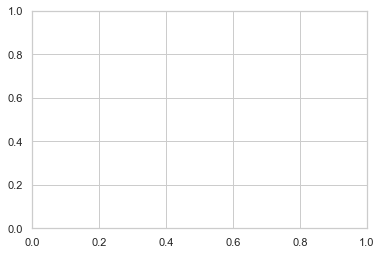

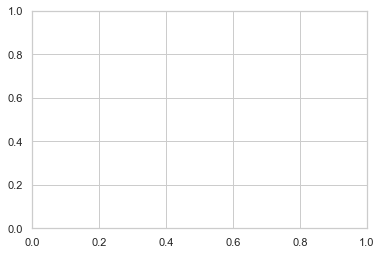

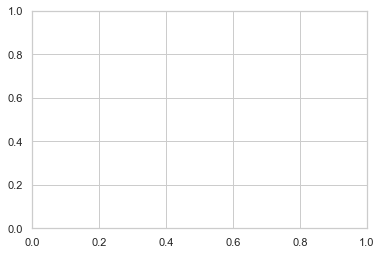

In [41]:
sns.set(style="whitegrid")

for file in files:
    with open(file) as f:
        d = json.load(f)
        print(d)
        # Make an example dataset with y ~ x
        # rs = np.random.RandomState(7)
        fig, ax = plt.subplots(1, 1)

        x = [int(i) for i in list(d.keys())]
        x.sort()
        x = [i for i in x if i < 290]
        print(x)
        y = []
#         for i in x:

#             keys = [int(z) for z in x]
#             keys.sort()
#             temp_y = []
#             for dif in d[str(i)].keys():
#                 temp_y += [int(dif) for f in range(0, d[str(i)][dif])]
#             y.append(statistics.mean(temp_y))

#         # Plot the residuals after fitting a linear model
#         print(file)
#         sns.heatmap([x,y], color="g")
#         ax.set(xlabel='True Length of Insert',
#                ylabel='Average(Overlapped Length - Gold standard Length)',
#                title="")
#         plt.show()
        
# Do heatmap
# Decrease bbmerge stringency 
# samtools
# work on paper
# work on 

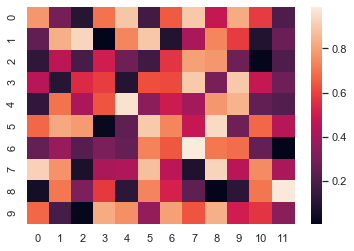

In [42]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

../raw_eval_data/overlapper/merged_bbmerge.fq.json
error          -10  -102  -105  -106  -108  -11  -110  -114  -12  -120  ...  \
insert_length                                                           ...   
100              0     0     0     0     0    0     0     0    0     0  ...   
101              0     0     0     0     0    0     0     0    0     0  ...   
102              0     0     0     0     0    0     0     0    0     0  ...   
103              0     0     0     0     0    0     0     0    0     0  ...   
104              0     0     0     0     0    0     0     0    0     0  ...   
...            ...   ...   ...   ...   ...  ...   ...   ...  ...   ...  ...   
392              0     0     0     0     0    0     0     0    0     0  ...   
393              0     0     0     0     0    0     0     0    0     0  ...   
396              0     0     0     0     0    0     0     0    0     0  ...   
398              0     0     0     0     0    0     0     0    0     0  ...   
3

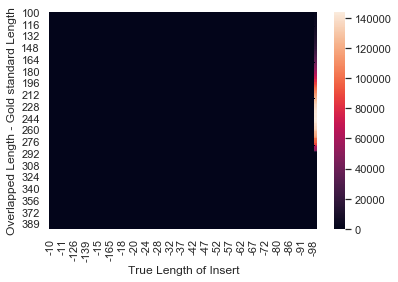

../raw_eval_data/overlapper/merged_hts.fa_SE.fastq.json
error          -1  -10  -100  -101  -102  -103  -104  -105  -106  -107  ...  \
insert_length                                                           ...   
100             0    0     0     0     0     0     0     0     0     0  ...   
101             0    0     0     0     0     0     0     0     0     0  ...   
102             0    0     0     0     0     0     0     0     0     0  ...   
103             0    0     0     0     0     0     0     0     0     0  ...   
104             0    0     0     0     0     0     0     0     0     0  ...   
...            ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
396             0    0     0     0     0     0     0     0     0     0  ...   
397             0    0     0     0     0     0     0     1     3     0  ...   
398             0    0     0     0     0     0     0     0     0     0  ...   
399             0    0     0     0     0     0     0     0     0     0  ...

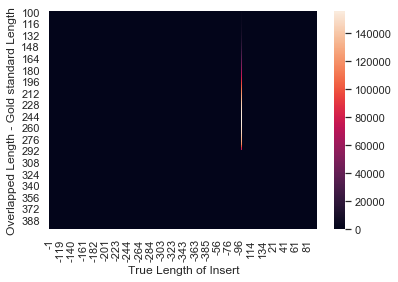

../raw_eval_data/overlapper/out.extendedFrags.fastq.json
error          -1  -10  -100  -101  -102  -103  -104  -105  -106  -107  ...  \
insert_length                                                           ...   
100             0    0     0     0     0     0     0     0     0     0  ...   
101             0    0     0     0     0     0     0     0     0     0  ...   
102             0    0     0     0     0     0     0     0     0     0  ...   
103             0    0     0     0     0     0     0     0     0     0  ...   
104             0    0     0     0     0     0     0     0     0     0  ...   
...            ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
396             0    0     0     0     0     0     0     0     3     1  ...   
397             0    0     0     0     0     0     0     0     0     3  ...   
398             0    0     0     0     0     0     0     0     0     0  ...   
399             0    0     0     0     0     0     0     0     0     0  ..

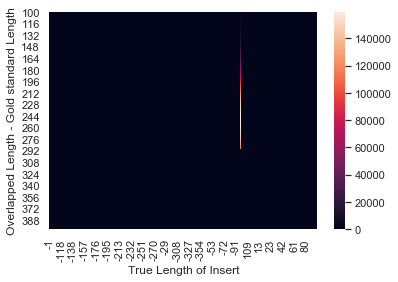

In [60]:
sns.set(style="whitegrid")
import pandas as pd
for file in files:
    with open(file) as f:
        d = json.load(f)
        
        # Make an example dataset with y ~ x
        # rs = np.random.RandomState(7)
        fig, ax = plt.subplots(1, 1)
        keys_ordered = [int(i) for i in d.keys()]
        keys_ordered.sort()
        keys_ordered = [str(i) for i in keys_ordered]
        df = pd.DataFrame(columns = ['insert_length','error','count'])
        for out in keys_ordered:
#             inner_ordered = [int(i) for i in d[].keys()]
#             inner_ordered.sort()
#             keys_ordered = [str(i) for i in keys_ordered]
            for inner in d[out].keys():
                df = df.append({'insert_length': out,'error': inner, 'count': d[out][inner]}, ignore_index=True)
            
        print(file)
        df = df.pivot('insert_length','error','count')
        df = df.fillna(0)
        print(df)
        sns.heatmap(df, color="g")
        ax.set(xlabel='True Length of Insert',
               ylabel='Overlapped Length - Gold standard Length',
               title="")
        plt.show()
        